# Fundamentos do Perceptron: Uma Abordagem Prática

## Sumário
1. [Introdução ao Perceptron](#intro)
2. [Problemas Lógicos OR e AND](#or-and)
3. [O Problema XOR e suas Implicações](#xor)

Este notebook apresenta uma introdução detalhada ao Perceptron, um dos primeiros modelos de redes neurais artificiais.

## 1. Introdução ao Perceptron <a id='intro'></a>

### 1.1 O que é um Perceptron?

O Perceptron é um modelo matemático de um neurônio biológico, proposto por Frank Rosenblatt em 1958. É a forma mais simples de uma rede neural artificial que pode ser usada para classificação binária e serve como bloco fundamental para redes neurais artificiais. Ele simula o comportamento de um neurônio biológico com um modelo computacional simples, sendo a base para redes neurais mais complexas.

### 1.2 Estrutura Básica

Um Perceptron consiste em:
1. Entradas ($x_1, x_2, ..., x_n$)
2. Pesos ($w_1, w_2, ..., w_n$)
3. Bias ($b$)
4. Função de ativação (degrau)

primeiro ele recebe as entradas, multiplica cada entrada pelo seu peso correspondente, soma todos os resultados e adiciona o bias e aplica uma função de ativaçao.


### 1.3 Fórmulas Matemáticas

A saída do Perceptron é calculada da seguinte forma:

1. Soma ponderada: $z = \sum_{i=1}^n w_i x_i + b$
2. Função de ativação: $f(z) = \begin{cases} 1 & \text{se } z \geq 0 \\ 0 & \text{se } z < 0 \end{cases}$

### 1.4 Algoritmo de Aprendizagem

O algoritmo de treinamento segue os seguintes passos:
1. Inicialização dos pesos e bias com valores aleatórios
2. Para cada exemplo de treinamento:
   - Calcular a saída prevista do perceptron, compara com o valor real e atualiza os pesos se houver erro.
   - Atualizar os pesos: $w_i = w_i + \alpha(y - \hat{y})x_i$
   - Atualizar o bias: $b = b + \alpha(y - \hat{y})$

onde $\alpha$ é a taxa de aprendizagem, $y$ é o valor real e $\hat{y}$ é a previsão.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib inline
from scipy.special import erf

plt.style.use('default')  # Usando estilo padrão do matplotlib

In [11]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        # Aqui defino os parâmetros iniciais do meu perceptron
        self.learning_rate = learning_rate  # Taxa de aprendizado - controla o tamanho dos ajustes
        self.n_iterations = n_iterations  # Máximo de vezes que vou passar pelos dados
        self.weights = None  # Ainda não sei quantos pesos vou precisar
        self.bias = None  # Viés também será definido depois
        self.errors_ = []  # Aqui vou guardar meus erros para acompanhar o aprendizado
        self.weights_history = []  # Histórico dos pesos pra ver como evoluem
        self.bias_history = []  # Histórico do bias também
    
    def fit(self, X, y):
        # Primeiro entendo o formato dos meus dados
        n_samples, n_features = X.shape 
        
        # Inicializo meus pesos como zeros (um para cada característica)
        # Começo com bias zero também
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Registro esse estado inicial no histórico
        self.weights_history.append(self.weights.copy())
        self.bias_history.append(self.bias)
        
        # Passo pelos dados várias vezes
        for _ in range(self.n_iterations):
            errors = 0  # Contador de erros nesta rodada
            
            # Para cada exemplo e seu rótulo verdadeiro
            for xi, target in zip(X, y):
                # Primeiro tento prever o rótulo com meus pesos atuais
                prediction = self.predict_one(xi)
                
                # Vejo o quanto errei (diferença entre o real e minha previsão)
                error = target - prediction
                
                # Se errei, ajusto meus pesos e bias
                # Quanto maior o learning_rate, maior o ajuste
                self.weights += self.learning_rate * error * xi
                self.bias += self.learning_rate * error
                
                # Se houve erro, contabilizo
                errors += int(error != 0)
            
            # Depois de passar por todos exemplos, guardo quantos errei
            self.errors_.append(errors)
            
            # Também guardo como estão meus pesos e bias agora
            self.weights_history.append(self.weights.copy())
            self.bias_history.append(self.bias)
            
            # Se não errei nenhum, posso parar antes!
            if errors == 0:
                break
        
        return self  # Retorno eu mesmo, agora treinado
    
    def predict_one(self, x):
        # Calculo a ativação: produto interno entre pesos e entradas + bias
        activation = np.dot(x, self.weights) + self.bias
        
        # Decisão: se >=0 retorna 1, senão 0 (função degrau)
        return 1 if activation >= 0 else 0
    
    def predict(self, X):
        # Para prever vários exemplos, aplico predict_one em cada um
        return np.array([self.predict_one(x) for x in X])

O Perceptron tenta encontrar um hiperplano (uma reta, no caso 2D) que separe os dados em duas classes (geralmente 0 e 1, ou -1 e 1).
O Perceptron é um dos algoritmos mais simples de aprendizado de máquina supervisionado, sendo a base para redes neurais artificiais. Ele é um classificador linear binário, ou seja, separa dados em duas classes usando uma fronteira de decisão linear.

## 2. Problemas Lógicos OR e AND <a id='or-and'></a>

Vamos implementar e visualizar o Perceptron resolvendo os problemas lógicos OR e AND.

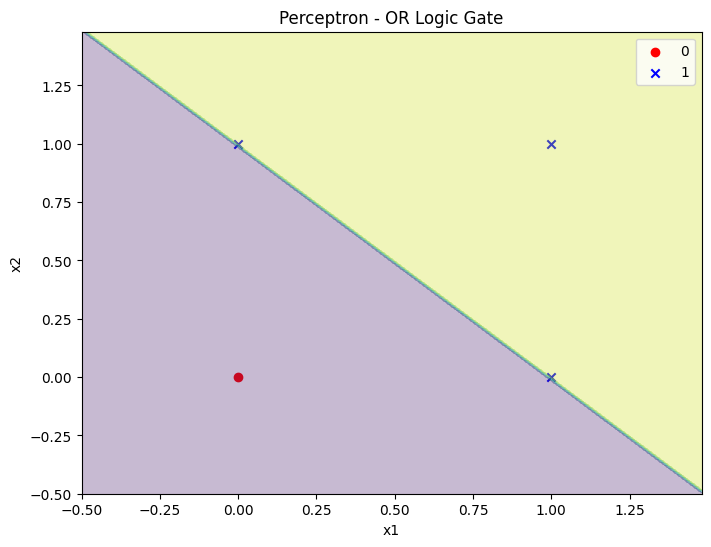

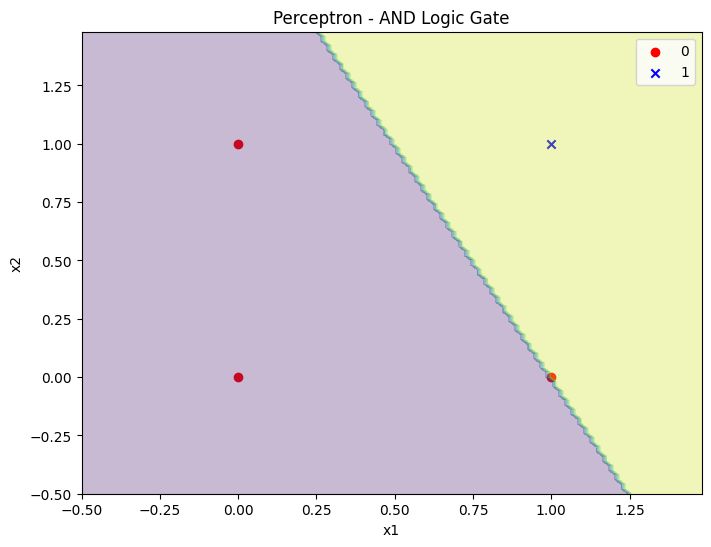

In [12]:
# Criação dos datasets
X_logic = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])  # OR
y_and = np.array([0, 0, 0, 1])  # AND

def plot_decision_boundary(X, y, perceptron, title):
    plt.figure(figsize=(8, 6))
    
    # Plot os pontos
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='1')
    
    # Criar grade para plotar a fronteira de decisão
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Calcular a fronteira de decisão
    Z = np.array([perceptron.predict_one([x1, x2]) 
                  for x1, x2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    
    # Plotar a fronteira de decisão
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.show()

# Treinar e visualizar OR
perceptron_or = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron_or.fit(X_logic, y_or)
plot_decision_boundary(X_logic, y_or, perceptron_or, 'Perceptron - OR Logic Gate')

# Treinar e visualizar AND
perceptron_and = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron_and.fit(X_logic, y_and)
plot_decision_boundary(X_logic, y_and, perceptron_and, 'Perceptron - AND Logic Gate')

Explicação da Fronteira de Decisão (OR)
A fronteira de decisão para o problema OR é uma linha reta que separa:

Classe 0: apenas o ponto (0,0)

Classe 1: pontos (0,1), (1,0) e (1,1)



Explicação da Fronteira de Decisão (AND)
Para o problema AND:

Classe 0: pontos (0,0), (0,1) e (1,0)

Classe 1: apenas o ponto (1,1)

A fronteira de decisão é uma linha com inclinação diferente da do OR, posicionada de forma que apenas (1,1) fique na região positiva. Os pesos aprendidos refletem a necessidade de ambas as entradas serem 1 para a saída ser 1.


O Perceptron consegue resolver perfeitamente problemas linearmente separáveis como OR e AND

A fronteira de decisão é uma linha reta cuja equação depende dos pesos aprendidos

Para o OR, a linha precisa separar (0,0) dos demais pontos

Para o AND, a linha precisa separar (1,1) dos demais pontos

O algoritmo converge rapidamente (em poucas épocas) para esses problemas simples

In [13]:
def animate_training(X_logic, y, model, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    def update(i):
        ax.clear()
        ax.scatter(X_logic[:, 0], X_logic[:, 1], c=y, s=100, cmap='viridis')
        ax.set_xlim(-0.5, 1.5)
        ax.set_ylim(-0.5, 1.5)
        ax.set_title(f"{title}\nÉpoca: {i}, Erros: {model.errors_[i] if i < len(model.errors_) else 0}")
        
        if i < len(model.weights_history):
            w = model.weights_history[i]
            b = model.bias_history[i]
            if w[1] != 0:
                x1 = np.array([-0.5, 1.5])
                x2 = -(w[0] * x1 + b) / w[1]
                ax.plot(x1, x2, 'r-', linewidth=2)
        
        ax.axhline(y=0, color='k', linestyle='--', alpha=0.2)
        ax.axvline(x=0, color='k', linestyle='--', alpha=0.2)
        ax.grid(True)
    
    anim = FuncAnimation(fig, update, frames=len(model.weights_history), interval=500)
    plt.close()
    return HTML(anim.to_jshtml())

# Animação para OR
animate_training(X_logic, y_or, perceptron_or, "Treinamento Perceptron - OR")

## 3. O Problema XOR e suas Implicações <a id='xor'></a>

O problema XOR é um marco histórico no desenvolvimento das redes neurais. Vamos demonstrar por que o Perceptron não consegue resolver este problema.

### 3.1 O Problema XOR

XOR (OU exclusivo) retorna:
- 1 quando exatamente uma das entradas é 1
- 0 quando ambas as entradas são 0 ou ambas são 1

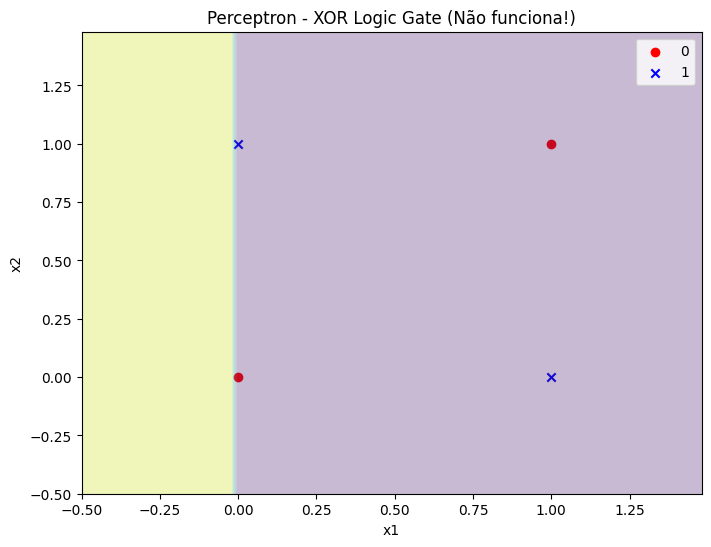

In [14]:
# Dataset XOR
y_xor = np.array([0, 1, 1, 0])  # XOR

# Tentar treinar o Perceptron com XOR
perceptron_xor = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron_xor.fit(X_logic, y_xor)
plot_decision_boundary(X_logic, y_xor, perceptron_xor, 'Perceptron - XOR Logic Gate (Não funciona!)')

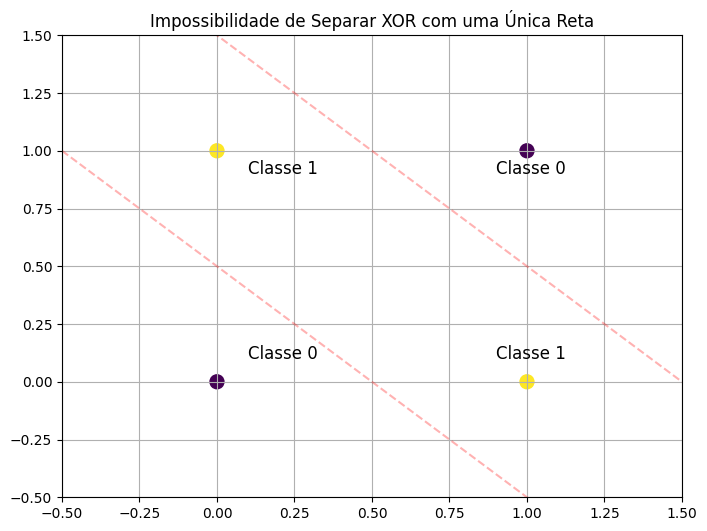

In [15]:
def plot_xor_limitation(X_logic, y_xor):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_logic[:, 0], X_logic[:, 1], c=y_xor, s=100, cmap='viridis')
    
    # Tentativa de fronteira linear
    x1 = np.linspace(-0.5, 1.5, 100)
    for w1, w2, b in [(1, 1, -0.5), (1, 1, -1.5)]:
        x2 = -(w1 * x1 + b) / w2
        plt.plot(x1, x2, 'r--', alpha=0.3)
    
    plt.title("Impossibilidade de Separar XOR com uma Única Reta")
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.grid(True)
    
    # Anotações
    plt.text(0.1, 0.1, "Classe 0", fontsize=12)
    plt.text(0.1, 0.9, "Classe 1", fontsize=12)
    plt.text(0.9, 0.1, "Classe 1", fontsize=12)
    plt.text(0.9, 0.9, "Classe 0", fontsize=12)
    
    plt.show()

plot_xor_limitation(X_logic, y_xor)

### 3.2 Por que o Perceptron falha no XOR?

O Perceptron falha no problema XOR porque:

1. O Perceptron só pode criar uma única linha reta como fronteira de decisão
2. O problema XOR não é linearmente separável
3. Precisamos de pelo menos duas linhas para separar os pontos do XOR
Uma linha para separar (0,1) e (1,1)

Outra linha para separar (1,0) e (1,1)
Problemas linearmente separáveis: podem ser divididos por um hiperplano

XOR: requer uma superfície de decisão não-linear

### 3.3 Impacto Histórico

A descoberta desta limitação por Minsky e Papert em 1969 levou a:
1. Um período de desinteresse em redes neurais ("AI Winter")
2. Desenvolvimento do Perceptron Multicamadas (MLP)
3. Avanços em arquiteturas mais complexas de redes neurais

O problema XOR demonstrou que precisávamos de redes mais complexas para resolver problemas não-lineares, levando ao desenvolvimento das redes neurais modernas.

Conclusão
O problema XOR foi fundamental para o desenvolvimento das redes neurais porque:

Revelou limitações fundamentais do Perceptron simples

Estimulou a pesquisa em arquiteturas mais complexas

Levou ao desenvolvimento das MLPs e do backpropagation

Mostrou a importância de:

Camadas ocultas

Não-linearidades

Aprendizado hierárquico de características

Atualmente, todas as redes neurais modernas (CNNs, RNNs, Transformers) são descendentes diretas das MLPs que surgiram como resposta ao problema XOR.

In [16]:
# 1. Função Linear
def linear(x):
    """Função de ativação Linear: f(x) = x"""
    return x

# 2. Função Step (Degrau)
def step(x):
    """Função Step: retorna 1 se x >= 0, 0 caso contrário"""
    return np.where(x >= 0, 1, 0)

# 3. Função Sigmoid
def sigmoid(x):
    """Função Sigmoid: f(x) = 1 / (1 + e^(-x))"""
    return 1 / (1 + np.exp(-x))

# 4. Função Tanh
def tanh(x):
    """Função Tangente Hiperbólica: f(x) = tanh(x)"""
    return np.tanh(x)

# 5. Função ReLU
def relu(x):
    """Função ReLU (Rectified Linear Unit): f(x) = max(0, x)"""
    return np.maximum(0, x)

# 6. Função Leaky ReLU
def leaky_relu(x, alpha=0.01):
    """
    Função Leaky ReLU: f(x) = x se x > 0, αx caso contrário
    alpha: inclinação para valores negativos
    """
    return np.where(x > 0, x, alpha * x)

# 7. Função ELU
def elu(x, alpha=1.0):
    """
    Função ELU (Exponential Linear Unit)
    f(x) = x se x > 0, α(e^x - 1) caso contrário
    """
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

# 8. Função Softplus
def softplus(x):
    """Função Softplus: f(x) = ln(1 + e^x)"""
    return np.log1p(np.exp(x))

# 9. Função SELU
def selu(x, alpha=1.67326, scale=1.0507):
    """
    Função SELU (Scaled Exponential Linear Unit)
    Parâmetros padrão para auto-normalização
    """
    return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))

# 10. Função GELU
def gelu(x):
    """
    Função GELU (Gaussian Error Linear Unit)
    Aproximação usando Error Function
    """
    return 0.5 * x * (1 + erf(x / np.sqrt(2)))

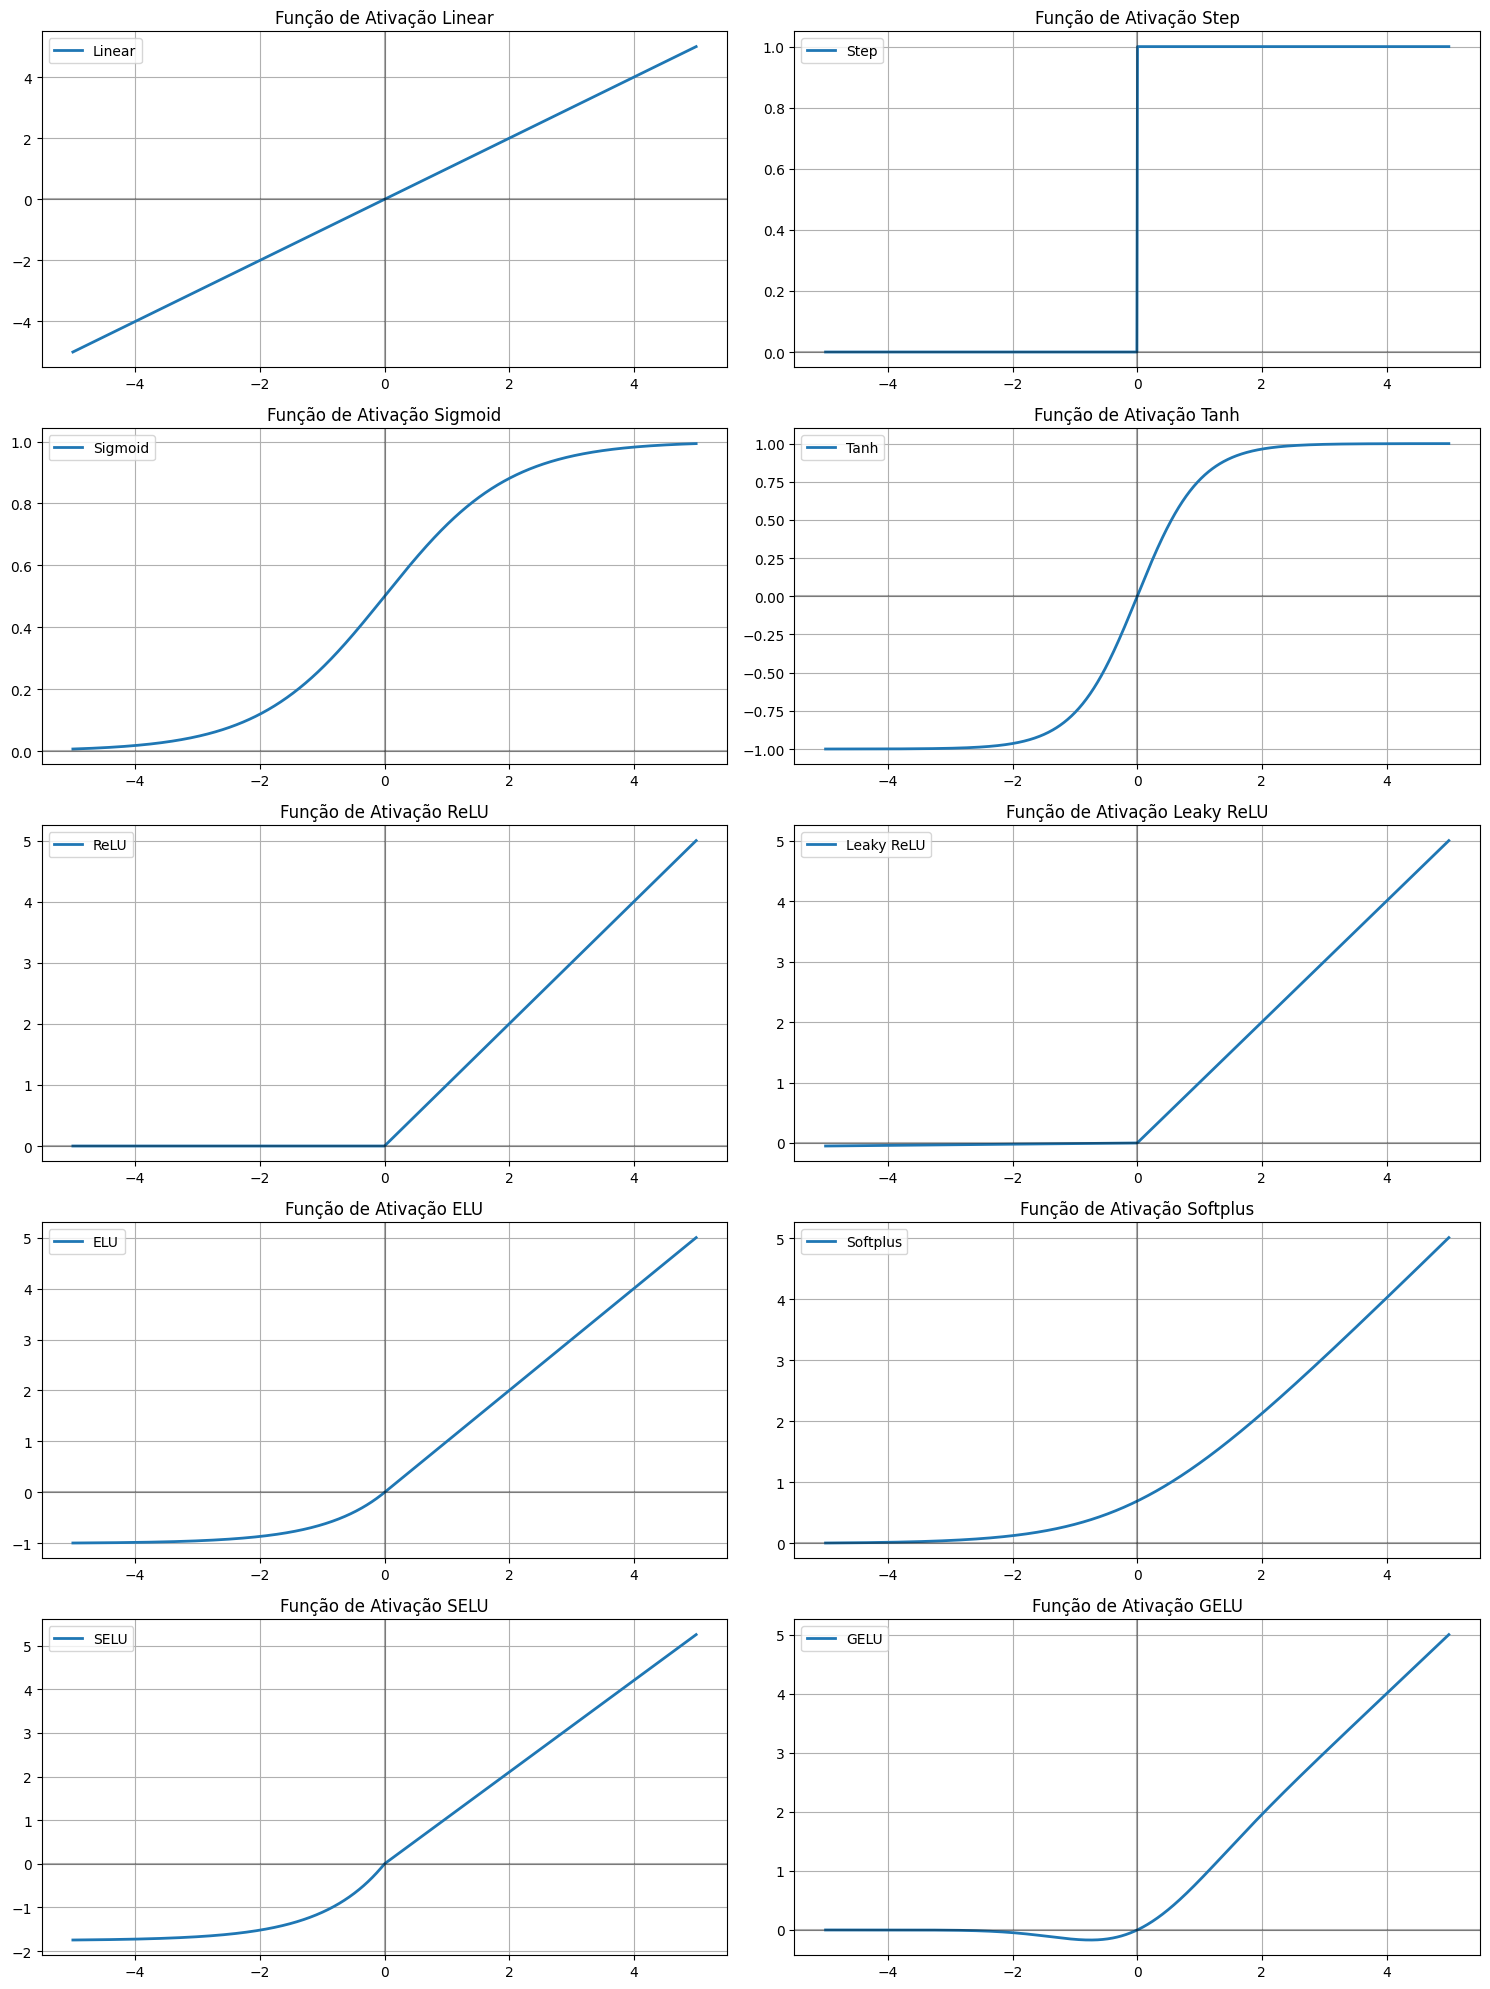

In [17]:
# Gerar dados de entrada
x = np.linspace(-5, 5, 1000)

# Criar subplots para todas as funções de ativação
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.ravel()

# Lista de funções e seus nomes
functions = [
    (linear, "Linear"),
    (step, "Step"),
    (sigmoid, "Sigmoid"),
    (tanh, "Tanh"),
    (relu, "ReLU"),
    (leaky_relu, "Leaky ReLU"),
    (elu, "ELU"),
    (softplus, "Softplus"),
    (selu, "SELU"),
    (gelu, "GELU")
]

# Plotar cada função de ativação
for i, (func, name) in enumerate(functions):
    y = func(x)
    axes[i].plot(x, y, label=name, linewidth=2)
    axes[i].set_title(f"Função de Ativação {name}")
    axes[i].grid(True)
    axes[i].legend()
    axes[i].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axes[i].axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()